## **Bài tập 1**

In [ ]:
# dataset
import numpy as np
import matplotlib.pyplot as plt
import random

# Hàm lấy một cột từ dữ liệu
def get_column(data, index):
    # Lấy tất cả các giá trị trong cột với index chỉ định
    result = [row[index] for row in data]
    return result

def prepare_data(file_name_dataset):
    # Đọc dữ liệu từ file CSV
    data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()
    N = len(data)

    # Lấy các cột dữ liệu tương ứng
    tv_data = get_column(data, 0)        # Lấy cột TV (index 0)
    radio_data = get_column(data, 1)     # Lấy cột Radio (index 1)
    newspaper_data = get_column(data, 2) # Lấy cột Newspaper (index 2)
    sales_data = get_column(data, 3)     # Lấy cột Sales (index 3)

    # Tạo X (input) và y (output) cho huấn luyện
    X = [tv_data, radio_data, newspaper_data]
    y = sales_data

    return X, y

In [ ]:
# Question 1:
X, y = prepare_data('/content/advertising.csv')
list = [sum(X[0][:5]), sum(X[1][:5]), sum(X[2][:5]), sum(y [:5])]
print(list)

[624.1, 175.10000000000002, 300.5, 78.9]


## **Bài tập 2**

In [ ]:
def initialize_params():
    w1, w2, w3, b = (0.016992259082509283, 0.0070783670518262355, -0.002307860847821344, 0)
    return w1, w2, w3, b
def predict(x1, x2, x3, w1, w2, w3, b):
    result = w1 * x1 + w2 * x2 + w3 * x3 + b
    return result
# Question 2:
y = predict(x1=1, x2=1, x3=1, w1=0, w2=0.5, w3=0, b=0.5)
print(y)

1.0


In [ ]:
# Question 3:
def compute_loss(y_hat, y):
    # Tính Mean Squared Error
    loss = (y_hat - y) ** 2
    return loss

l = compute_loss(y_hat=1, y=0.5)
print(l)

0.25


In [ ]:
# Tính đạo hàm theo wi
def compute_gradient_wi(xi, y, y_hat):
    # Đạo hàm theo wi
    dl_dwi = 2 * (y_hat - y) * xi
    return dl_dwi

# Tính đạo hàm theo b
def compute_gradient_b(y, y_hat):
    # Đạo hàm theo b
    dl_db = 2 * (y_hat - y)
    return dl_db

# Question 4:
# MSE loss
g_wi = compute_gradient_wi(xi=1.0, y=1.0, y_hat=0.5)
print(g_wi)

-1.0


In [ ]:
# Question 5:
g_b = compute_gradient_b(y=2.0, y_hat=0.5)
print(g_b)

-3.0


In [ ]:
# Cập nhật trọng số wi
def update_weight_wi(wi, dl_dwi, lr):
    # Cập nhật trọng số theo công thức gradient descent
    wi = wi - lr*dl_dwi
    return wi

# Cập nhật bias b
def update_weight_b(b, dl_db, lr):
    # Cập nhật bias theo công thức gradient descent
    b = b - lr*dl_db
    return b

# Question 6:
after_wi = update_weight_wi(wi=1.0, dl_dwi=-0.5, lr=1e-5)
print(after_wi)

1.000005


In [ ]:
# Question 7:
after_b = update_weight_b(b=0.5, dl_db=-1.0, lr=1e-5)
print(after_b)

0.50001


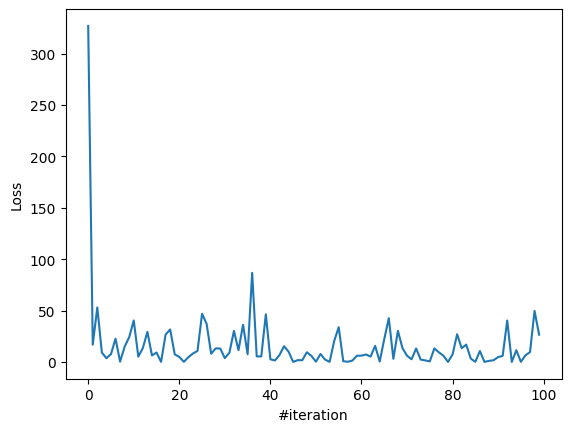

In [ ]:
# Tính loss theo công thức MSE (Mean Squared Error)
def compute_loss_mse(y, y_hat):
    return (y_hat - y) ** 2

# Hàm huấn luyện Linear Regression với one-sample training
def implement_linear_regression(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []
    w1, w2, w3, b = initialize_params()
    N = len(y_data)

    for epoch in range(epoch_max):
        for i in range(N):
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # Compute output
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Compute loss
            loss = compute_loss(y_hat, y)

            # Compute gradients
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # Update parameters
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            # Logging
            losses.append(loss)

    return w1, w2, w3, b, losses

(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

In [ ]:
# Question 8:
X, y = prepare_data('/content/advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, y)
print('w1 = ', w1)
print('w2 = ', w2)
print('w3 = ', w3)

w1 =  0.07405984066396477
w2 =  0.15917360263437663
w3 =  0.017561197559948935


In [ ]:
# Question 9:
# given new data
tv = 19.2
radio = 35.9
newspaper = 51.3
X, y = prepare_data('/content/advertising.csv')
(w1, w2, w3, b, losses) = implement_linear_regression(X, y, epoch_max =50, lr=1e-5)
sales = predict(tv, radio, newspaper, w1, w2, w3, b)
print(f'predicted sales is { sales }')

predicted sales is 8.176413319549823


In [ ]:
# Question 10:
def compute_loss_mae(y_hat, y):
    # Tính Mean Absolute Error
    loss = abs(y_hat - y)
    return loss
l = compute_loss_mae(y_hat=1, y=0.5)
print(l)

0.5


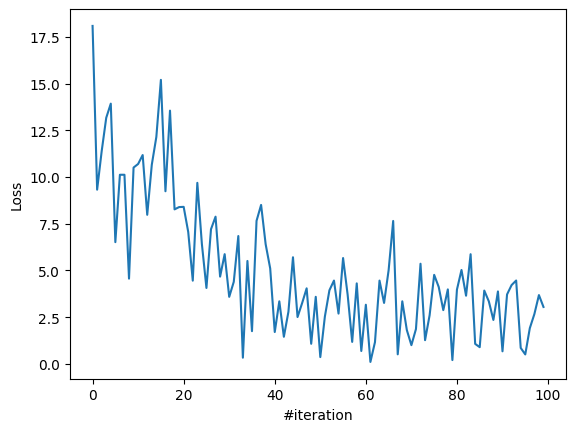

In [ ]:
def compute_gradient_wi_mae(xi, y, y_hat):
    # Đạo hàm theo wi:
    dl_dwi = np.sign(y_hat - y) * xi
    return dl_dwi

def compute_gradient_b_mae(y, y_hat):
    # Đạo hàm theo b:
    dl_db = np.sign(y_hat - y)
    return dl_db

def implement_linear_regression_mae(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    # Khởi tạo tham số
    w1, w2, w3, b = initialize_params()

    N = len(y_data)
    for epoch in range(epoch_max):
        for i in range(N):
            # Lấy một sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # Tính đầu ra dự đoán y_hat
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Tính loss
            loss = compute_loss_mae(y, y_hat)

            # Tính gradient cho w1, w2, w3, và b
            dl_dw1 = compute_gradient_wi_mae(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi_mae(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi_mae(x3, y, y_hat)
            dl_db = compute_gradient_b_mae(y, y_hat)

            # Cập nhật tham số
            w1 = update_weight_wi(w1, dl_dw1, lr)
            w2 = update_weight_wi(w2, dl_dw2, lr)
            w3 = update_weight_wi(w3, dl_dw3, lr)
            b = update_weight_b(b, dl_db, lr)

            # Lưu lại giá trị loss
            losses.append(loss)

    return w1, w2, w3, b, losses

(w1, w2, w3, b, losses) = implement_linear_regression_mae(X, y)
plt.plot(losses[:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.show()

## **Bài tập 3**

In [ ]:
# Hàm huấn luyện Linear Regression với batch N samples-training
def implement_linear_regression_nsamples(X_data, y_data, epoch_max=50, lr=1e-5):
    losses = []

    # Khởi tạo tham số
    w1, w2, w3, b = initialize_params()

    N = len(y_data)
    for epoch in range(epoch_max):
        # Reset tổng loss và gradient
        loss_total = 0.0
        dw1_total = 0.0
        dw2_total = 0.0
        dw3_total = 0.0
        db_total = 0.0

        for i in range(N):
            # Lấy một sample
            x1 = X_data[0][i]
            x2 = X_data[1][i]
            x3 = X_data[2][i]
            y = y_data[i]

            # Tính đầu ra dự đoán y_hat
            y_hat = predict(x1, x2, x3, w1, w2, w3, b)

            # Tính loss cho sample này
            loss = compute_loss_mse(y, y_hat)

            # Tích lũy tổng loss
            loss_total += loss

            # Tính gradient cho w1, w2, w3, và b
            dl_dw1 = compute_gradient_wi(x1, y, y_hat)
            dl_dw2 = compute_gradient_wi(x2, y, y_hat)
            dl_dw3 = compute_gradient_wi(x3, y, y_hat)
            dl_db = compute_gradient_b(y, y_hat)

            # Tích lũy tổng gradient
            dw1_total += dl_dw1
            dw2_total += dl_dw2
            dw3_total += dl_dw3
            db_total += dl_db

        # Cập nhật tham số sau khi xử lý toàn bộ batch
        w1 = update_weight_wi(w1, dw1_total / N, lr)
        w2 = update_weight_wi(w2, dw2_total / N, lr)
        w3 = update_weight_wi(w3, dw3_total / N, lr)
        b = update_weight_b(b, db_total / N, lr)

        # Lưu lại giá trị loss trung bình cho epoch này
        losses.append(loss_total / N)

    return w1, w2, w3, b, losses

In [ ]:
# Question 11:
X, y = prepare_data('/content/advertising.csv')
# using MSE loss
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples (X, y, epoch_max=50, lr=1e-5)
print(w1, w2, w3)

0.0777391352775665 0.05644769904625777 0.04135488482198375


[172.98395547828923, 39.4081674745134, 18.15746728564735, 14.634633779162357, 13.913880074022757, 13.640049637323427, 13.441395294810789, 13.259118517018994, 13.083802587178743, 12.913826664416215, 12.748804182322559, 12.58854742072041, 12.432904005847659, 12.281730988201284, 12.134890631437667, 11.992249630675893, 11.853678875589457, 11.719053303032835, 11.588251767260099, 11.461156916275085, 11.33765507239911, 11.217636116651946, 11.100993376782947, 10.987623518830576, 10.877426442098113, 10.77030517743778, 10.666165788738786, 10.564917277518694, 10.466471490519933, 10.370743030217112, 10.277649168143098, 10.187109760945372, 10.099047169086274, 10.013386178104167, 9.930053922354572, 9.848979811153313, 9.770095457245782, 9.69333460752933, 9.61863307595747, 9.545928678557278, 9.475161170493593, 9.406272185115144, 9.339205174920474, 9.273905354383018, 9.210319644576826, 9.148396619546123, 9.088086454363877, 9.029340874825948, 8.972113108729593, 8.916357838686066, 8.86203115641928, 8.809

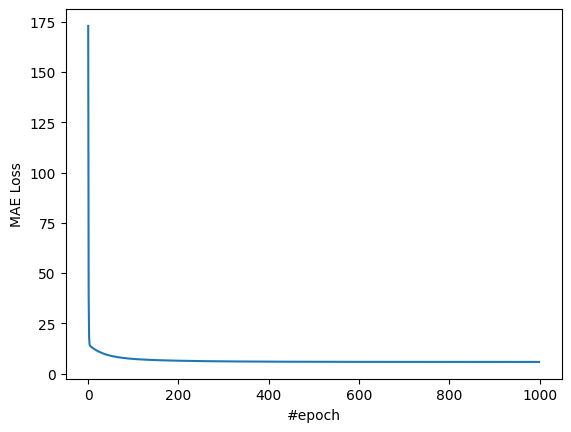

In [ ]:
(w1, w2, w3, b, losses) = implement_linear_regression_nsamples(X, y, epoch_max=1000, lr=1e-5)

print(losses)
plt.plot(losses)
plt.xlabel("#epoch")
plt.ylabel("MAE Loss")
plt.show()

## **Bài tập 4**

In [ ]:
def prepare_data(file_name_dataset):
  data = np.genfromtxt(file_name_dataset, delimiter=',', skip_header=1).tolist()

  # get tv (index =0)
  tv_data = get_column(data, 0)

  # get radio (index =1)
  radio_data = get_column(data, 1)

  # get newspaper (index =2)
  newspaper_data = get_column(data, 2)

  # get sales ( index =3)
  sales_data = get_column(data, 3)

  # building X input and y output for training
  # Create list of features for input
  X = [[1, x1, x2, x3] for x1, x2, x3 in zip(tv_data, radio_data, newspaper_data)]
  y = sales_data
  return X, y
def initialize_params():
    bias = 0
    w1 = random.gauss(mu=0.0, sigma=0.01)
    w2 = random.gauss(mu=0.0, sigma=0.01)
    w3 = random.gauss(mu=0.0, sigma=0.01)

    # comment this line for real application
    return [0, -0.01268850433497871, 0.004752496982185252, 0.0073796171538643845]
    # return [bias , w1 , w2 , w3]

In [ ]:
# Predict output y_hat using y = x0*b + x1*w1 + x2*w2 + x3*w3
def predict(X_features, weights):
    # Calculate the dot product between features and weights
    result = sum(x * w for x, w in zip(X_features, weights))
    return result
# Compute MSE loss between predicted y_hat and actual y
def compute_loss(y_hat, y):
    return (y_hat - y) ** 2
# Compute gradient of the loss with respect to weights
def compute_gradient_w(X_features, y, y_hat):
    dl_dweights = [(y_hat - y) * x for x in X_features]  # Gradient of MSE loss wrt weights
    return dl_dweights
# Update weights based on the gradients and learning rate
def update_weight(weights, dl_dweights, lr):
    # Update each weight by subtracting the gradient times the learning rate
    weights = [w - lr * dw for w, dw in zip(weights, dl_dweights)]
    return weights

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49


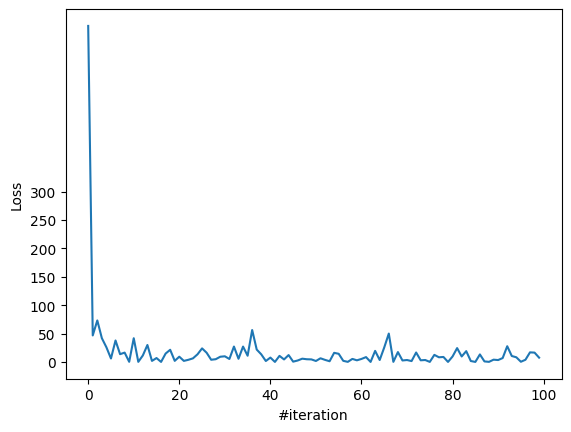

In [ ]:
# Hàm huấn luyện Linear Regression với N samples
def implement_linear_regression(X_feature, y_ouput, epoch_max=10000, lr=1e-5):
    losses = []
    weights = initialize_params()  # Khởi tạo trọng số
    N = len(y_ouput)  # Số lượng mẫu

    for epoch in range(epoch_max):
        print("Epoch", epoch)
        for i in range(N):
            # Lấy một sample - hàng i
            features_i = X_feature[i]
            y = y_ouput[i]

            # Tính đầu ra dự đoán y_hat
            y_hat = predict(features_i, weights)

            # Tính loss
            loss = compute_loss(y, y_hat)

            # Tính gradient cho w1, w2, w3, và b
            dl_dweights = compute_gradient_w(features_i, y, y_hat)

            # Cập nhật trọng số
            weights = update_weight(weights, dl_dweights, lr)

            # Lưu lại giá trị loss
            losses.append(loss)

    return weights, losses

# Chuẩn bị dữ liệu và huấn luyện mô hình
X, y = prepare_data('/content/advertising.csv')
W, L = implement_linear_regression(X, y)

# Vẽ đồ thị loss
plt.plot(L[0:100])
plt.xlabel("#iteration")
plt.ylabel("Loss")
plt.yticks([0, 50, 100, 150, 200, 250, 300])
plt.show()

In [ ]:
# Question 12:
X, y = prepare_data('advertising.csv')
W, L = implement_linear_regression(X, y, epoch_max=50, lr=1e-5)
# Print loss value at iteration 9999
print(L[9999])

Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49
4.102721429098558
